### Claude Shyaka
### ID#: 801326243

# Homework 1: Estimate Housing Price Using Linear Regression With Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
housing = pd.read_csv('./data/Housing.csv', delimiter=',')

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
m = len(housing)
m

545

In [5]:
housing.shape

(545, 13)

In [6]:
# The dataset has many columns with 'Yes' and 'No'

# List of variable to map to numerical values.
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', \
           'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
# Helper function to reshape the input matrix as a column vector and append X0.
def transform_and_append_X0(X, m, n):
    # Reshape the input matrix as a column vector
    X_ = X.reshape(m, n)

    # Create the X0 column vector
    X0 = np.ones((m, 1))

    # Combine the input matrix with the X0 vector
    X = np.hstack((X0, X_))
    
    return X

In [8]:
def compute_loss(X, y, m, theta):
    """
    Compute loss for linear regression.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    
    Output Parameters
    -----------------
    J : Scalar values. 
    """
    predictions = X.dot(theta) # predictions = h
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2*m) * np.sum(sqrErrors)
    
    return J

In [9]:
def gradient_descent(X_train, y_train, m_train, X_test, y_test, m_test, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    alpha : Learning rate. Scalar value.
    iterations: Number of iterations. Scalar value.
    
    Output Parameters
    -----------------
    theta : Final value. 1xn array of fitting parameters of weights. Dimension (1xn)
    cost_history : Contains value of cost for each iteration. Dimension (mx1)
    """
    train_loss_history = np.zeros(iterations)
    test_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X_train.dot(theta) # prediction (m,1)
        errors = np.subtract(predictions, y_train) # Error (m,1) = temp
        sum_delta = (alpha/m_train) * X_train.transpose().dot(errors) # sum_delta (n,1)
        # print("sum delta\n", sum_delta)
        theta = theta - sum_delta
        train_loss_history[i] = compute_loss(X_train, y_train, m_train, theta)
        test_loss_history[i] = compute_loss(X_test, y_test, m_test, theta)
    
    return theta, train_loss_history, test_loss_history

In [10]:
# Linear regression with three explanatory variables
def RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, iterations):
    
    # Get train set dimensions
    m_train = len(X_train)
    n_train = len(X_train[0, :])
    
    # Get test set dimensions
    m_test = len(X_test)
    n_test = len(X_test[0, :])
    
    # Check if number of features in test set is the same as train set
    if n_test != n_train:
        return "Error: Check your number of features!"

    # Reshape the input matrix as a column vector and append X0.
    X_train = transform_and_append_X0(X_train, m_train, n_train)
    X_test = transform_and_append_X0(X_test, m_test, n_test)

    # Initialize the theta parameters
    theta = np.zeros((n_train+1, 1))

    # compute the train cost for theta values
    train_loss = compute_loss(X_train, y_train, m_train, theta)
    print('Initial train set cost for given values of thetas =', train_loss)
    
    # compute the test cost for theta values
    test_loss = compute_loss(X_test, y_test, m_test, theta)
    print('Initial test set cost for given values of thetas =', test_loss)

    # Initialize theta.
    theta = np.zeros((n_train+1))

    # Run the gradient descent with the given parameter
    theta, train_loss_history, test_loss_history = gradient_descent(X_train, y_train, m_train, 
                                                                    X_test, y_test, m_test,
                                                                    theta, alpha, iterations)
    print('Final value of theta\n', theta)
    print('Last ten train Loss history\n', train_loss_history[iterations-10:])
    print('Last ten test Loss history\n', test_loss_history[iterations-10:])
    return train_loss_history, test_loss_history


In [11]:
# Split the Data into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the
# the same rows, respectively 
np.random.seed(42)
df_train, df_test = train_test_split(housing, train_size=0.8,
                                     test_size=0.2)
df_train.shape

(436, 13)

In [12]:
df_test.shape

(109, 13)

## Problem 1.a.

In [13]:
num_vars = ['area', 'bedrooms', 'bathrooms', \
            'stories', 'parking', 'price']

df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,parking,price
46,6000,3,2,4,1,7525000
93,7200,3,2,1,3,6300000
335,3816,2,1,1,2,3920000
412,2610,3,1,2,0,3430000
471,3750,3,1,2,0,3010000


In [14]:
# split features and labels in train set
y_df_train = df_new_train.pop('price')
X_df_train = df_new_train.copy()

In [15]:
# split features and labels in test set
y_df_test = df_new_test.pop('price')
X_df_test = df_new_test.copy()

In [16]:
# Extract values from train set dataframes
y_train = y_df_train.values
X_train = X_df_train.values

In [17]:
# Extract values from test set dataframes
y_test = y_df_test.values
X_test = X_df_test.values

In [18]:
# initialize alpha and number of iterations
alpha = 0.000000001
iterations = 1000

In [19]:
# Evaluate loss for on training set
train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, iterations)

Initial train set cost for given values of thetas = 5501184744614302.0
Initial test set cost for given values of thetas = 1642084674125000.2
Final value of theta
 [5.25190152e-01 8.37930064e+02 1.83467039e+00 9.41126654e-01
 1.43762692e+00 4.13349336e-01]
Last ten train Loss history
 [1.58937247e+12 1.58937247e+12 1.58937246e+12 1.58937246e+12
 1.58937246e+12 1.58937245e+12 1.58937245e+12 1.58937244e+12
 1.58937244e+12 1.58937243e+12]
Last ten test Loss history
 [2.03407027e+12 2.03407027e+12 2.03407026e+12 2.03407026e+12
 2.03407026e+12 2.03407025e+12 2.03407025e+12 2.03407025e+12
 2.03407024e+12 2.03407024e+12]


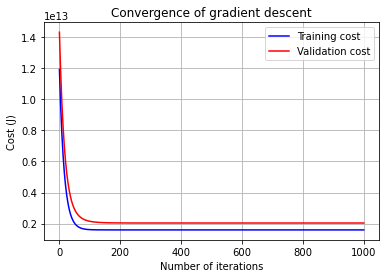

In [20]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training cost')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

## Problem 1.b

In [21]:
num_vars = ['area', 'bedrooms', 'bathrooms', \
            'stories','mainroad', 'guestroom', \
            'basement', 'hotwaterheating', 'airconditioning', \
            'parking', 'prefarea', 'price']

df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
46,6000,3,2,4,1,0,0,0,1,1,0,7525000
93,7200,3,2,1,1,0,1,0,1,3,0,6300000
335,3816,2,1,1,1,0,1,0,1,2,0,3920000
412,2610,3,1,2,1,0,1,0,0,0,1,3430000
471,3750,3,1,2,1,0,0,0,0,0,0,3010000


In [22]:
# split features and labels in train set
y_df_train = df_new_train.pop('price')
X_df_train = df_new_train.copy()

In [23]:
# split features and labels in test set
y_df_test = df_new_test.pop('price')
X_df_test = df_new_test.copy()

In [24]:
# Extract values from train set dataframes
y_train = y_df_train.values
X_train = X_df_train.values

In [25]:
# Extract values from test set dataframes
y_test = y_df_test.values
X_test = X_df_test.values

In [26]:
# initialize alpha and number of iterations
alpha = 0.000000001
iterations = 1000

In [27]:
# Evaluate loss for on training set
train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, iterations)

Initial train set cost for given values of thetas = 5501184744614302.0
Initial test set cost for given values of thetas = 1642084674125000.2
Final value of theta
 [5.25190092e-01 8.37929945e+02 1.83467020e+00 9.41126576e-01
 1.43762680e+00 4.55244427e-01 1.51525272e-01 3.27136506e-01
 5.71614141e-02 3.65255486e-01 4.13349299e-01 1.88677526e-01]
Last ten train Loss history
 [1.58937207e+12 1.58937206e+12 1.58937206e+12 1.58937205e+12
 1.58937205e+12 1.58937205e+12 1.58937204e+12 1.58937204e+12
 1.58937203e+12 1.58937203e+12]
Last ten test Loss history
 [2.03406991e+12 2.03406991e+12 2.03406990e+12 2.03406990e+12
 2.03406989e+12 2.03406989e+12 2.03406989e+12 2.03406988e+12
 2.03406988e+12 2.03406987e+12]


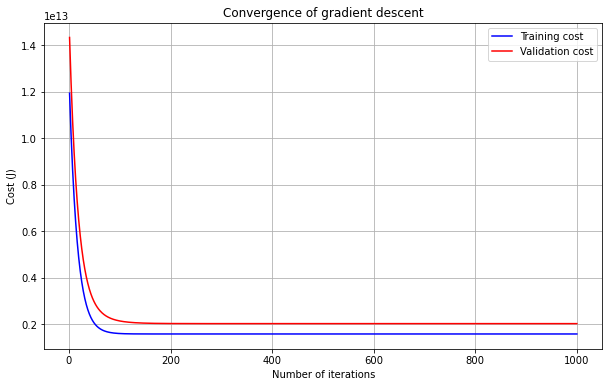

In [28]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training cost')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation cost')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

## Problem 2.a
### Using MinMaxScaler

In [29]:
num_vars = ['area', 'bedrooms', 'bathrooms', \
            'stories', 'parking', 'price']

df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,parking,price
46,6000,3,2,4,1,7525000
93,7200,3,2,1,3,6300000
335,3816,2,1,1,2,3920000
412,2610,3,1,2,0,3430000
471,3750,3,1,2,0,3010000


In [30]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler() 

In [31]:
# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])
df_new_train.head()

,area,bedrooms,bathrooms,stories,parking,price
46,0.298969,0.4,0.333333,1.000000,0.333333,0.550000
93,0.381443,0.4,0.333333,0.000000,1.000000,0.433333
335,0.148866,0.2,0.000000,0.000000,0.666667,0.206667
412,0.065979,0.4,0.000000,0.333333,0.000000,0.160000
471,0.144330,0.4,0.000000,0.333333,0.000000,0.120000


In [32]:
# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

In [33]:
# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [34]:
# initialize alpha and number of iterations
alpha = 0.07
iterations = 5000

In [35]:
# Evaluate loss for on training set
train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, iterations)

Initial train set cost for given values of thetas = 23.38076507586667
Initial test set cost for given values of thetas = 6.400204637281909
Final value of theta
 [0.06106362 0.4276229  0.07301228 0.33826214 0.14133862 0.09655966]
Last ten train Loss history
 [0.0061225 0.0061225 0.0061225 0.0061225 0.0061225 0.0061225 0.0061225
 0.0061225 0.0061225 0.0061225]
Last ten test Loss history
 [0.010759   0.01075902 0.01075903 0.01075904 0.01075905 0.01075907
 0.01075908 0.01075909 0.01075911 0.01075912]


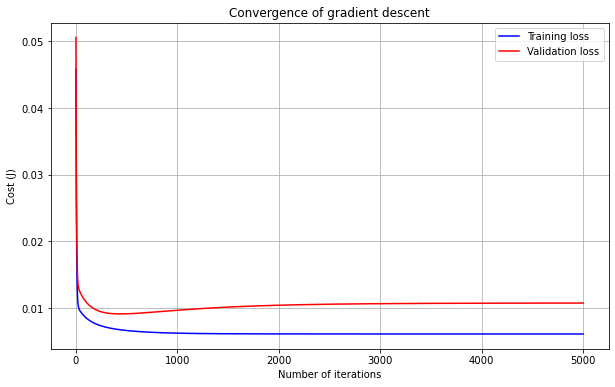

In [36]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training loss')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

### Using StandardScaler

In [37]:
df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,parking,price
46,6000,3,2,4,1,7525000
93,7200,3,2,1,3,6300000
335,3816,2,1,1,2,3920000
412,2610,3,1,2,0,3430000
471,3750,3,1,2,0,3010000


In [38]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [39]:
# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])
df_new_train.head()

,area,bedrooms,bathrooms,stories,parking,price
46,0.384168,0.055271,1.539173,2.587644,0.367957,1.605090
93,0.929181,0.055271,1.539173,-0.912499,2.709987,0.907466
335,-0.607755,-1.283514,-0.557950,-0.912499,1.538972,-0.447919
412,-1.155492,0.055271,-0.557950,0.254215,-0.803059,-0.726969
471,-0.637730,0.055271,-0.557950,0.254215,-0.803059,-0.966154


In [40]:
# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [41]:
# initialize alpha and number of iterations
alpha = 0.07
iterations = 200

In [42]:
# Evaluate loss for on training set
train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, iterations)

Initial train set cost for given values of thetas = 217.99999999999997
Initial test set cost for given values of thetas = 54.50000000000002
Final value of theta
 [-2.32505147e-16  3.87276615e-01  6.43808210e-02  3.21974112e-01
  2.41639880e-01  1.64218426e-01]
Last ten train Loss history
 [0.21891606 0.21891606 0.21891606 0.21891606 0.21891606 0.21891606
 0.21891606 0.21891606 0.21891606 0.21891606]
Last ten test Loss history
 [0.21166532 0.21166539 0.21166545 0.21166552 0.21166557 0.21166563
 0.21166569 0.21166574 0.21166579 0.21166584]


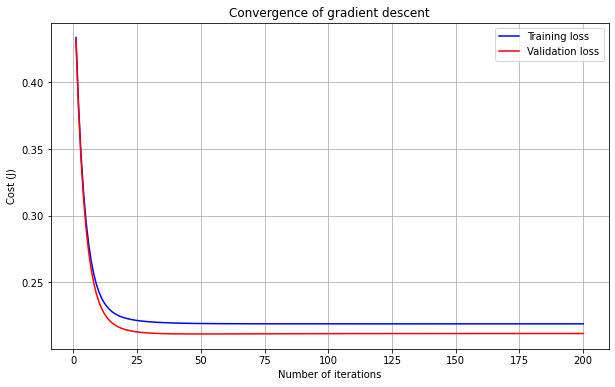

In [43]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training loss')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

## Problem 2.b.
### Using MinMaxScaler

In [44]:
num_vars = ['area', 'bedrooms', 'bathrooms', \
            'stories','mainroad', 'guestroom', \
            'basement', 'hotwaterheating', 'airconditioning', \
            'parking', 'prefarea', 'price']

df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
46,6000,3,2,4,1,0,0,0,1,1,0,7525000
93,7200,3,2,1,1,0,1,0,1,3,0,6300000
335,3816,2,1,1,1,0,1,0,1,2,0,3920000
412,2610,3,1,2,1,0,1,0,0,0,1,3430000
471,3750,3,1,2,1,0,0,0,0,0,0,3010000


In [45]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler() 

# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])

# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [46]:
# initialize alpha and number of iterations
alpha = 0.05
iterations = 10000

In [47]:
# Evaluate loss for on training set
train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, iterations)

Initial train set cost for given values of thetas = 23.38076507586667
Initial test set cost for given values of thetas = 6.400204637281909
Final value of theta
 [0.01750661 0.32933579 0.03757911 0.31686295 0.1219358  0.03932317
 0.023207   0.04142007 0.06783841 0.07699635 0.0707033  0.0606436 ]
Last ten train Loss history
 [0.00450105 0.00450105 0.00450105 0.00450105 0.00450105 0.00450105
 0.00450105 0.00450105 0.00450105 0.00450105]
Last ten test Loss history
 [0.00865081 0.00865081 0.00865081 0.00865081 0.00865081 0.00865082
 0.00865082 0.00865082 0.00865082 0.00865082]


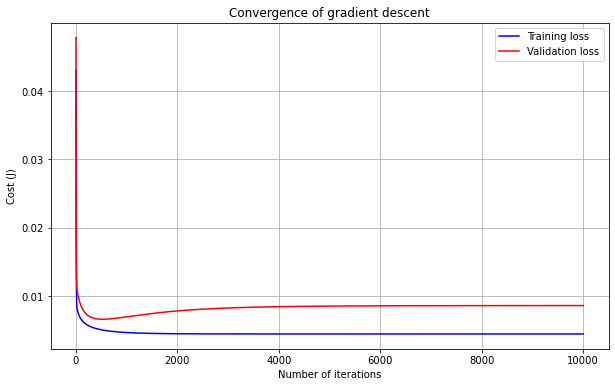

In [48]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training loss')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

### Using the StandardScaler

In [49]:
df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
46,6000,3,2,4,1,0,0,0,1,1,0,7525000
93,7200,3,2,1,1,0,1,0,1,3,0,6300000
335,3816,2,1,1,1,0,1,0,1,2,0,3920000
412,2610,3,1,2,1,0,1,0,0,0,1,3430000
471,3750,3,1,2,1,0,0,0,0,0,0,3010000


In [50]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])

# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [51]:
# initialize alpha and number of iterations
alpha = 0.01
iterations = 3000

In [52]:
# Evaluate loss for on training set
train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, iterations)

Initial train set cost for given values of thetas = 217.99999999999997
Initial test set cost for given values of thetas = 54.50000000000002
Final value of theta
 [-2.11810691e-16  2.98063221e-01  3.33855502e-02  3.01245784e-01
  2.08379895e-01  8.20810195e-02  5.31714972e-02  1.18749960e-01
  8.87876163e-02  2.12417392e-01  1.20336746e-01  1.53520797e-01]
Last ten train Loss history
 [0.16093978 0.16093978 0.16093978 0.16093978 0.16093978 0.16093978
 0.16093978 0.16093978 0.16093978 0.16093978]
Last ten test Loss history
 [0.16041555 0.16041556 0.16041556 0.16041556 0.16041556 0.16041556
 0.16041556 0.16041556 0.16041556 0.16041556]


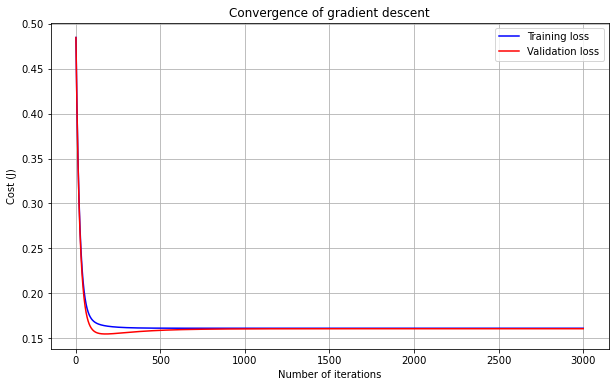

In [53]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training loss')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

## Problem 3

### Modified loss function and gradient descent.

In [54]:
def compute_loss2(X, y, m, lam, theta):
    """
    Compute loss for linear regression with parameter penalization.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    
    Output Parameters
    -----------------
    J : Scalar values. 
    """
    predictions = X.dot(theta) # predictions = h
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    sqrTheta = np.square(theta[1:])
    J = 1 / (2*m) * (np.sum(sqrErrors) + (lam*np.sum(sqrTheta)))
    
    return J

In [55]:
def gradient_descent2(X_train, y_train, m_train, X_test, y_test, m_test, theta, alpha, lam, iterations):
    """
    Compute cost for linear regression with parameter penalization.
    
    Input Parameters
    ----------------
    X : mxn array where each row represent the training example and each column represent a feature
        m= number of training examples
        n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each training example. Dimension(m,1)
    theta : nx1 array of fitting parameters or weights. Dimension (n,1)
    alpha : Learning rate. Scalar value.
    iterations: Number of iterations. Scalar value.
    
    Output Parameters
    -----------------
    theta : Final value. 1xn array of fitting parameters of weights. Dimension (1xn)
    cost_history : Contains value of cost for each iteration. Dimension (mx1)
    """
    train_loss_history = np.zeros(iterations)
    test_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X_train.dot(theta) # prediction (m,1)
        errors = np.subtract(predictions, y_train) # Error (m,1) = temp
        sum_delta = (alpha/m_train) * X_train.transpose().dot(errors) # sum_delta (n,1)

        theta[0] = theta[0] - sum_delta[0]
        theta[1:] = ((1 - (alpha*(lam/m_train)))*theta[1:]) - sum_delta[1:]
        
        train_loss_history[i] = compute_loss2(X_train, y_train, m_train, lam, theta)
        test_loss_history[i] = compute_loss(X_test, y_test, m_test, theta)
    
    return theta, train_loss_history, test_loss_history

In [56]:
# Linear regression with parameter penalization
def RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, lam, iterations):
    
    # Get train set dimensions
    m_train = len(X_train)
    n_train = len(X_train[0, :])
    
    # Get test set dimensions
    m_test = len(X_test)
    n_test = len(X_test[0, :])
    
    # Check if number of features in test set is the same as train set
    if n_test != n_train:
        return "Error: Check your number of features!"

    # Reshape the input matrix as a column vector and append X0.
    X_train = transform_and_append_X0(X_train, m_train, n_train)
    X_test = transform_and_append_X0(X_test, m_test, n_test)

    # Initialize the theta parameters
    theta = np.zeros((n_train+1, 1))

    # compute the train cost for theta values
    train_loss = compute_loss2(X_train, y_train, m_train, lam, theta)
    # print('Initial train set cost for given values of thetas =', train_loss)
    
    # compute the test cost for theta values
    test_loss = compute_loss(X_test, y_test, m_test, theta)
    # print('Initial test set cost for given values of thetas =', test_loss)

    # Initialize theta.
    theta = np.zeros((n_train+1))

    # Run the gradient descent with the given parameter
    theta, train_loss_history, test_loss_history = gradient_descent2(X_train, y_train, m_train, 
                                                                    X_test, y_test, m_test,
                                                                    theta, alpha, lam, iterations)
    return theta, train_loss_history, test_loss_history

### Part a.
### Using MinMaxScaler

In [57]:
num_vars = ['area', 'bedrooms', 'bathrooms', \
            'stories', 'parking', 'price']

df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,parking,price
46,6000,3,2,4,1,7525000
93,7200,3,2,1,3,6300000
335,3816,2,1,1,2,3920000
412,2610,3,1,2,0,3430000
471,3750,3,1,2,0,3010000


In [58]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler() 

# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])

# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [59]:
# initialize alpha and number of iterations
alpha = 0.01
iterations = 5000

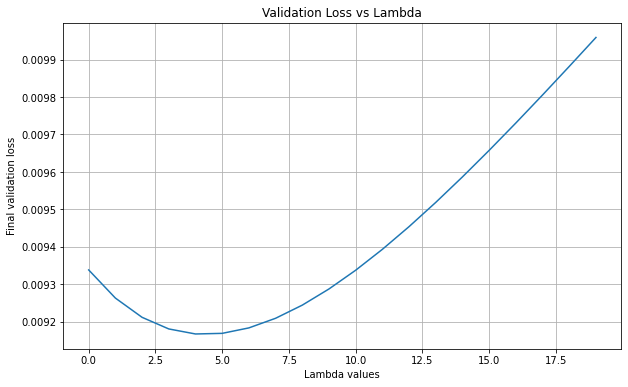

In [60]:
theta = list()
train_loss_history = list() 
test_loss_history = list()
test_loss = {}
for i in np.arange(0, 20, 1):
    theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, i, iterations)
    test_loss[i] = test_loss_history[-1]

# # print(test_loss)
plt.plot(test_loss.keys(), test_loss.values())
plt.grid()
plt.xlabel('Lambda values')
plt.ylabel('Final validation loss')
plt.title('Validation Loss vs Lambda')
plt.show()

In [61]:
# Lambda value with the minimal validation loss.
lam = min(test_loss, key=test_loss.get)

# Evaluate loss for on training and validation set
theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, lam, iterations)
print("Final lambda value\n", lam)
print("Final values of theta\n", theta)
print("Last ten train_loss_history values\n", train_loss_history)
print("Last ten test_loss_history values\n", test_loss_history)

Final lambda value
 4
Final values of theta
 [0.09623126 0.25222817 0.09754609 0.21862442 0.14630162 0.12776445]
Last ten train_loss_history values
 [0.05246234 0.05133042 0.05022899 ... 0.00737514 0.00737509 0.00737505]
Last ten test_loss_history values
 [0.0575063  0.05632757 0.05518042 ... 0.00916764 0.00916766 0.00916769]


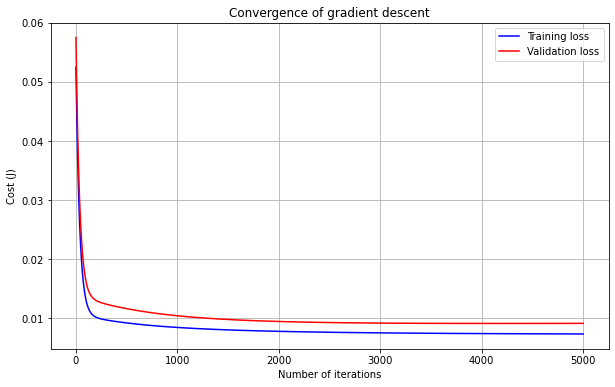

In [62]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training loss')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

### Using StandardScaler

In [63]:
df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,parking,price
46,6000,3,2,4,1,7525000
93,7200,3,2,1,3,6300000
335,3816,2,1,1,2,3920000
412,2610,3,1,2,0,3430000
471,3750,3,1,2,0,3010000


In [64]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])

# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [65]:
# initialize alpha and number of iterations
alpha = 0.007
iterations = 2000

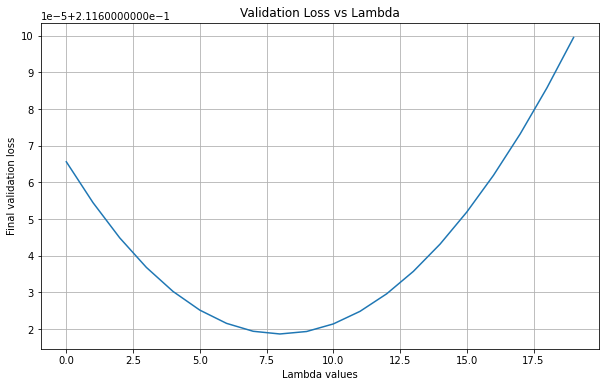

In [66]:
theta = list()
train_loss_history = list() 
test_loss_history = list()
test_loss = {}
for i in np.arange(0, 20, 1):
    theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, i, iterations)
    test_loss[i] = test_loss_history[-1]

# # print(test_loss)
plt.plot(test_loss.keys(), test_loss.values())
plt.grid()
plt.xlabel('Lambda values')
plt.ylabel('Final validation loss')
plt.title('Validation Loss vs Lambda')
plt.show()

In [67]:
# Lambda value with the minimal validation loss.
lam = min(test_loss, key=test_loss.get)

# Evaluate loss for on training and validation set
theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, lam, iterations)
print("Final lambda value\n", lam)
print("Final values of theta\n", theta)
print("Last ten train_loss_history values\n", train_loss_history)
print("Last ten test_loss_history values\n", test_loss_history)

Final lambda value
 8
Final values of theta
 [-2.26512489e-16  3.81075517e-01  6.74241032e-02  3.17419393e-01
  2.37932177e-01  1.63943300e-01]
Last ten train_loss_history values
 [0.49294952 0.48608473 0.47940066 ... 0.22202214 0.22202214 0.22202214]
Last ten test_loss_history values
 [0.49281177 0.48581011 0.47899009 ... 0.21161867 0.21161868 0.21161868]


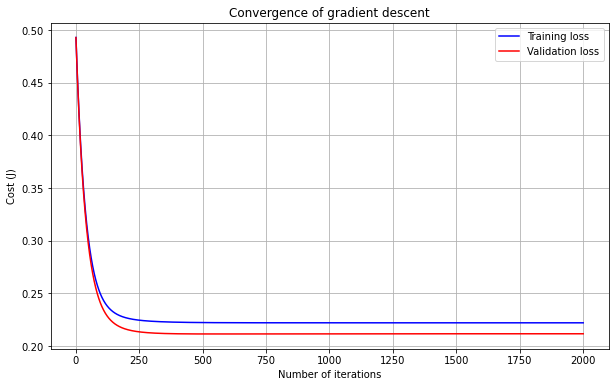

In [68]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training loss')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

### Part b.
### Using MinMaxScaler

In [69]:
num_vars = ['area', 'bedrooms', 'bathrooms', \
            'stories','mainroad', 'guestroom', \
            'basement', 'hotwaterheating', 'airconditioning', \
            'parking', 'prefarea', 'price']

df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
46,6000,3,2,4,1,0,0,0,1,1,0,7525000
93,7200,3,2,1,1,0,1,0,1,3,0,6300000
335,3816,2,1,1,1,0,1,0,1,2,0,3920000
412,2610,3,1,2,1,0,1,0,0,0,1,3430000
471,3750,3,1,2,1,0,0,0,0,0,0,3010000


In [70]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler() 

# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])

# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [71]:
# initialize alpha and number of iterations
alpha = 0.02
iterations = 2000

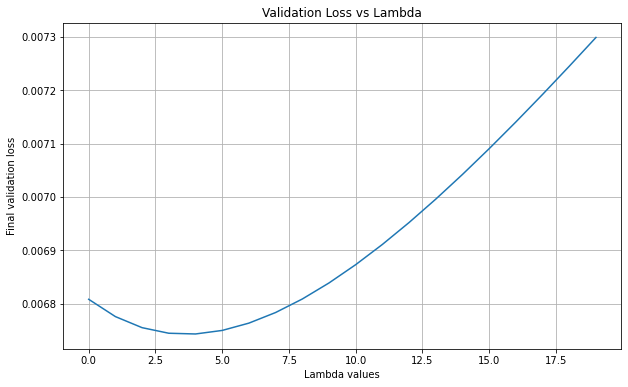

In [72]:
theta = list()
train_loss_history = list() 
test_loss_history = list()
test_loss = {}
for i in np.arange(0, 20, 1):
    theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, i, iterations)
    test_loss[i] = test_loss_history[-1]
    # print("test_loss", i, ":", test_loss[i])

# # print(test_loss)
plt.plot(test_loss.keys(), test_loss.values())
plt.grid()
plt.xlabel('Lambda values')
plt.ylabel('Final validation loss')
plt.title('Validation Loss vs Lambda')
plt.show()

In [73]:
# Lambda value with the minimal validation loss.
lam = min(test_loss, key=test_loss.get)

# Evaluate loss for on training and validation set
theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, lam, iterations)
print("Final lambda value\n", lam)
print("Final values of theta\n", theta)
print("Last ten train_loss_history values\n", train_loss_history)
print("Last ten test_loss_history values\n", test_loss_history)

Final lambda value
 4
Final values of theta
 [0.03767428 0.16864589 0.07177316 0.18358491 0.11901366 0.04921358
 0.03469782 0.03741588 0.05700237 0.08708735 0.0965626  0.06297393]
Last ten train_loss_history values
 [0.04922676 0.04525851 0.04167858 ... 0.00548505 0.00548492 0.0054848 ]
Last ten test_loss_history values
 [0.05418338 0.05008821 0.04638911 ... 0.00674322 0.00674332 0.00674343]


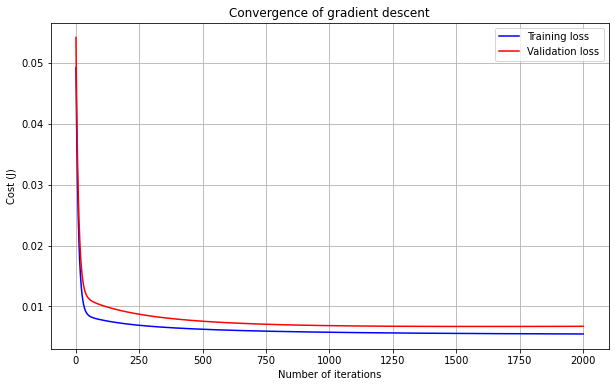

In [74]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training loss')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

### Using StandardScaler

In [75]:
df_new_train = df_train[num_vars]
df_new_test = df_test[num_vars]
df_new_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
46,6000,3,2,4,1,0,0,0,1,1,0,7525000
93,7200,3,2,1,1,0,1,0,1,3,0,6300000
335,3816,2,1,1,1,0,1,0,1,2,0,3920000
412,2610,3,1,2,1,0,1,0,0,0,1,3430000
471,3750,3,1,2,1,0,0,0,0,0,0,3010000


In [76]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Normalized train set
df_new_train[num_vars] = scaler.fit_transform(df_new_train[num_vars])

# Normalized test set
df_new_test[num_vars] = scaler.fit_transform(df_new_test[num_vars])

# split features and labels in train set
y_norm_train = df_new_train.pop('price')
X_norm_train = df_new_train.copy()

# split features and labels in test set
y_norm_test = df_new_test.pop('price')
X_norm_test = df_new_test.copy()

# Extract values from train set dataframes
y_train = y_norm_train.values
X_train = X_norm_train.values

# Extract values from test set dataframes
y_test = y_norm_test.values
X_test = X_norm_test.values

In [77]:
# initialize alpha and number of iterations
alpha = 0.007
iterations = 2000

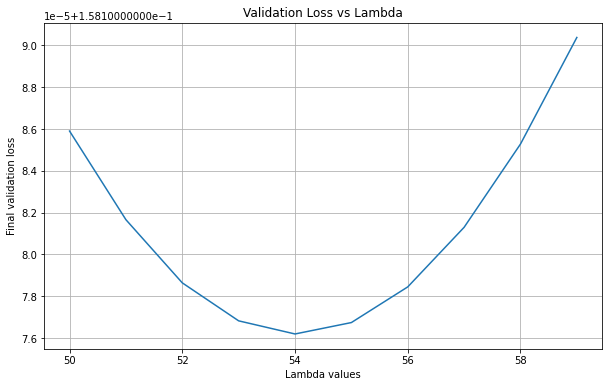

In [78]:
theta = list()
train_loss_history = list() 
test_loss_history = list()
test_loss = {}
for i in np.arange(50, 60, 1):
    theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, i, iterations)
    test_loss[i] = test_loss_history[-1]
    # print("test_loss", i, ":", test_loss[i])

# # print(test_loss)
plt.plot(test_loss.keys(), test_loss.values())
plt.grid()
plt.xlabel('Lambda values')
plt.ylabel('Final validation loss')
plt.title('Validation Loss vs Lambda')
plt.show()
# Evaluate loss for on training set
# print("Final values of theta\n", theta)
# print("Last ten train_loss_history values\n", train_loss_history)
# print("Last ten test_loss_history values\n", test_loss_history)

In [79]:
# Lambda value with the minimal validation loss.
lam = min(test_loss, key=test_loss.get)

# Evaluate loss for on training and validation set
theta, train_loss_history, test_loss_history = RunLinearRegression2(X_train, y_train, X_test, y_test, alpha, lam, iterations)
print("Final values of theta\n", theta)
print("Last ten train_loss_history values\n", train_loss_history)
print("Last ten test_loss_history values\n", test_loss_history)

Final values of theta
 [-2.08882096e-16  2.70540497e-01  5.40457716e-02  2.74463097e-01
  1.87332411e-01  8.67686086e-02  6.14149406e-02  1.03649045e-01
  7.82996583e-02  2.00842154e-01  1.21430477e-01  1.41511026e-01]
Last ten train_loss_history values
 [0.48934168 0.47904839 0.4691075  ... 0.18031153 0.18031153 0.18031153]
Last ten test_loss_history values
 [0.48926754 0.47888504 0.4688408  ... 0.15817618 0.15817619 0.1581762 ]


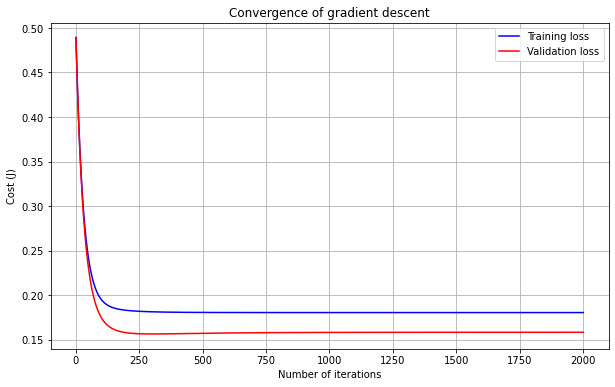

In [80]:
# plot the loss history
plt.plot(range(1, iterations+1), train_loss_history, color='blue', label='Training loss')
plt.plot(range(1, iterations+1), test_loss_history, color='red', label='Validation loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()